## CDC - What Factors Drive Vaccination Rates

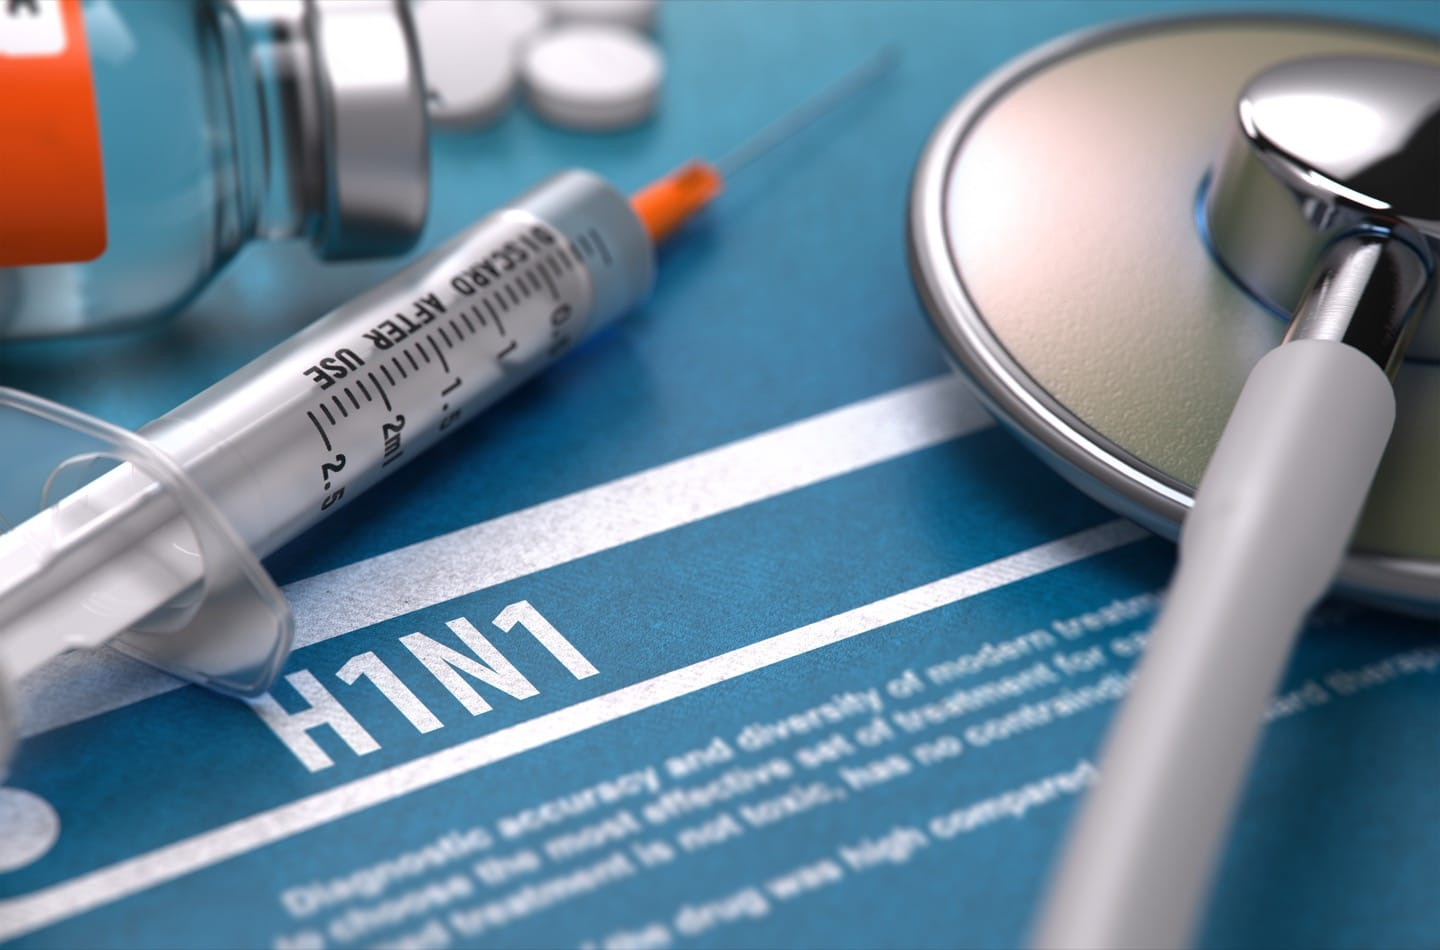

### Organization Overview

The novel coronavirus (Covid-19 or SARS-CoV-2) has gripped the world since its believed outbreak in late 2019. Governments and people around the world have since had to endure personal, economic, and social hardships in an unprecedented scale. The vaccine rollout for Covid-19 began in in January, 2021 for ages 65 and older. By August, around 70% of the US population are reported to have been vaccinated with at least the first dosage. However, this rate is still 8.5 million people short of its previous goal to fully vaccinate 165 million individuals. In order to reach this goal, this research aims to identify the driving factors which increase the likelihood of an individual getting innoculated. The research looks at previous data regarding the H1N1 Influenza outbreak in 2009 as well as data regarding seasonal flu shots. By identifying features that have the most impact in vaccination rates for these two viruses, the CDC can implement new campagins to improve vaccination rates to combat further outbreaks of Covid-19.

#### Research Question:

##### What features determine the likelihood of vaccination against H1N1 Influenza?
##### What features determine the likelihood of vaccination against the Seasonal Flu?
##### What strategies can the CDC implement in improving Covid-19 vaccination rates using analyses about previous corovirus outbreaks?

In [1]:
ls

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import time

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, recall_score, precision_score

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)


In [3]:
data = pd.read_csv('training_set_features.csv')
data_labels = pd.read_csv('training_set_labels.csv')

#### The dataset contains 36 features. Below are their descriptions

- h1n1_concern - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
- h1n1_knowledge - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
- behavioral_antiviral_meds - Has taken antiviral medications. (binary)
- behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
- behavioral_face_mask - Has bought a face mask. (binary)
- behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
- behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
- behavioral_outside_home - Has reduced contact with people outside of own household. (binary)
- behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)
- doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
- doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
- chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
- child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
- health_worker - Is a healthcare worker. (binary)
- health_insurance - Has health insurance. (binary)
- opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- age_group - Age group of respondent.
- education - Self-reported education level.
- race - Race of respondent.
- sex - Sex of respondent.
- income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.
- marital_status - Marital status of respondent.
- rent_or_own - Housing situation of respondent.
- employment_status - Employment status of respondent.
- hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
- census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
- household_adults - Number of other adults in household, top-coded to 3.
- household_children - Number of children in household, top-coded to 3.
- employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
- employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

## First Look at Data

In [4]:
data.set_index('respondent_id', inplace = True)

In [5]:
data.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                      1.00            0.00                       0.00   
1                      3.00            2.00                       0.00   
2                      1.00            1.00                       0.00   
3                      1.00            1.00                       0.00   
4                      2.00            1.00                       0.00   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                              0.00                  0.00   
1                              1.00                  0.00   
2                              1.00                  0.00   
3                              1.00                  0.00   
4                              1.00                  0.00   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                               0.00                         0.00   
1                               1.00                         0.00   
2                               0.00                         0.00   
3                               1.00                         1.00   
4                               1.00                         1.00   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                 1.00                   1.00   
1                                 1.00                   1.00   
2                                 0.00                   0.00   
3                                 0.00                   0.00   
4                                 0.00                   1.00   

               doctor_recc_h1n1  doctor_recc_seasonal  chronic_med_condition  \
respondent_id                                                                  
0                          0.00                  0.00                   0.00   
1                          0.00                  0.00                   0.00   
2                           nan                   nan                   1.00   
3                          0.00                  1.00                   1.00   
4                          0.00                  0.00                   0.00   

               child_under_6_months  health_worker  health_insurance  \
respondent_id                                                          
0                              0.00           0.00              1.00   
1                              0.00           0.00              1.00   
2                              0.00           0.00               nan   
3                              0.00           0.00               nan   
4                              0.00           0.00               nan   

               opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
respondent_id                                                   
0                                     3.00               1.00   
1                                     5.00               4.00   
2                                     3.00               1.00   
3                                     3.00               3.00   
4                                     3.00               3.00   

               opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
respondent_id                                                             
0                                     2.00                         2.00   
1                                     4.00                         4.00   
2                                     1.00                         4.00   
3                                     5.00                         5.00   
4                                     2.00                         3.00   

               opinion_seas_risk  opinion_seas_sick_from_vacc      age_group  \


In [6]:
data.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

Although most columns have little null values, 'employment_occupation', 'employment_industry', and 'health_insurance' possess null values for nearly half of column's observations

In [8]:
data.describe()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count     26,615.00       26,591.00                  26,636.00   
mean           1.62            1.26                       0.05   
std            0.91            0.62                       0.22   
min            0.00            0.00                       0.00   
25%            1.00            1.00                       0.00   
50%            2.00            1.00                       0.00   
75%            2.00            2.00                       0.00   
max            3.00            2.00                       1.00   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count             26,499.00             26,688.00              26,665.00   
mean                   0.73                  0.07                   0.83   
std                    0.45                  0.25                   0.38   
min                    0.00                  0.00                   0.00   
25%                    0.00                  0.00                   1.00   
50%                    1.00                  0.00                   1.00   
75%                    1.00                  0.00                   1.00   
max                    1.00                  1.00                   1.00   

       behavioral_large_gatherings  behavioral_outside_home  \
count                    26,620.00                26,625.00   
mean                          0.36                     0.34   
std                           0.48                     0.47   
min                           0.00                     0.00   
25%                           0.00                     0.00   
50%                           0.00                     0.00   
75%                           1.00                     1.00   
max                           1.00                     1.00   

       behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
count              26,579.00         24,547.00             24,547.00   
mean                    0.68              0.22                  0.33   
std                     0.47              0.41                  0.47   
min                     0.00              0.00                  0.00   
25%                     0.00              0.00                  0.00   
50%                     1.00              0.00                  0.00   
75%                     1.00              0.00                  1.00   
max                     1.00              1.00                  1.00   

       chronic_med_condition  child_under_6_months  health_worker  \
count              25,736.00             25,887.00      25,903.00   
mean                    0.28                  0.08           0.11   
std                     0.45                  0.28           0.32   
min                     0.00                  0.00           0.00   
25%                     0.00                  0.00           0.00   
50%                     0.00                  0.00           0.00   
75%                     1.00                  0.00           0.00   
max                     1.00                  1.00           1.00   

       health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
count         14,433.00                    26,316.00          26,319.00   
mean               0.88                         3.85               2.34   
std                0.33                         1.01               1.29   
min                0.00                         1.00               1.00   
25%                1.00                         3.00               1.00   
50%                1.00                         4.00               2.00   
75%                1.00                         5.00               4.00   
max                1.00                         5.00               5.00   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
count                    26,312.00                    26,245.00   
mean                          2.36                         4.03   
std        

In [9]:
data.mean()

h1n1_concern                  1.62
h1n1_knowledge                1.26
behavioral_antiviral_meds     0.05
behavioral_avoidance          0.73
behavioral_face_mask          0.07
behavioral_wash_hands         0.83
behavioral_large_gatherings   0.36
behavioral_outside_home       0.34
behavioral_touch_face         0.68
doctor_recc_h1n1              0.22
doctor_recc_seasonal          0.33
chronic_med_condition         0.28
child_under_6_months          0.08
health_worker                 0.11
health_insurance              0.88
opinion_h1n1_vacc_effective   3.85
opinion_h1n1_risk             2.34
opinion_h1n1_sick_from_vacc   2.36
opinion_seas_vacc_effective   4.03
opinion_seas_risk             2.72
opinion_seas_sick_from_vacc   2.12
household_adults              0.89
household_children            0.53
dtype: float64

In [10]:
data_labels.set_index('respondent_id', inplace = True)

In [11]:
data_labels

h1n1_vaccine  seasonal_vaccine
respondent_id                                
0                         0                 0
1                         0                 1
2                         0                 0
3                         0                 1
4                         0                 0
...                     ...               ...
26702                     0                 0
26703                     0                 0
26704                     0                 1
26705                     0                 0
26706                     0                 0

[26707 rows x 2 columns]

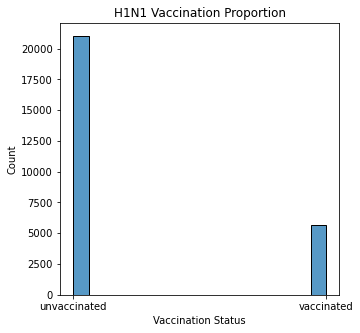

In [12]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.histplot(data_labels['h1n1_vaccine'])
plt.xticks(np.arange(2), ['unvaccinated', 'vaccinated'])
ax.set_xlabel('Vaccination Status')
ax.set_ylabel('Count')
ax.set_title('H1N1 Vaccination Proportion');
#Only about one-fifth of the total sample population were innoculated against the H1N1 Influenza. 
#However, the imbalance between the the observations should not affect our modeling.

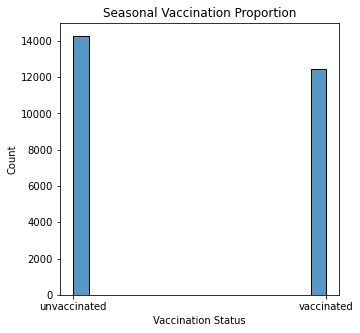

In [13]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.histplot(data_labels['seasonal_vaccine'])
plt.xticks(np.arange(2), ['unvaccinated', 'vaccinated'])
ax.set_xlabel('Vaccination Status')
ax.set_ylabel('Count')
ax.set_title('Seasonal Vaccination Proportion');
#The proportion between unvaccinated and vaccinated individuals is more evenly split for seasonal vaccination

In [14]:
df = data_labels.join(data)

In [15]:
df

h1n1_vaccine  seasonal_vaccine  h1n1_concern  h1n1_knowledge  \
respondent_id                                                                 
0                         0                 0          1.00            0.00   
1                         0                 1          3.00            2.00   
2                         0                 0          1.00            1.00   
3                         0                 1          1.00            1.00   
4                         0                 0          2.00            1.00   
...                     ...               ...           ...             ...   
26702                     0                 0          2.00            0.00   
26703                     0                 0          1.00            2.00   
26704                     0                 1          2.00            2.00   
26705                     0                 0          1.00            1.00   
26706                     0                 0          0.00            0.00   

               behavioral_antiviral_meds  behavioral_avoidance  \
respondent_id                                                    
0                                   0.00                  0.00   
1                                   0.00                  1.00   
2                                   0.00                  1.00   
3                                   0.00                  1.00   
4                                   0.00                  1.00   
...                                  ...                   ...   
26702                               0.00                  1.00   
26703                               0.00                  1.00   
26704                               0.00                  1.00   
26705                               0.00                  0.00   
26706                               0.00                  1.00   

               behavioral_face_mask  behavioral_wash_hands  \
respondent_id                                                
0                              0.00                   0.00   
1                              0.00                   1.00   
2                              0.00                   0.00   
3                              0.00                   1.00   
4                              0.00                   1.00   
...                             ...                    ...   
26702                          0.00                   0.00   
26703                          0.00                   1.00   
26704                          1.00                   1.00   
26705                          0.00                   0.00   
26706                          0.00                   0.00   

               behavioral_large_gatherings  behavioral_outside_home  \
respondent_id                                                         
0                                     0.00                     1.00   
1                                     0.00                     1.00   
2                                     0.00                     0.00   
3                                     1.00                     0.00   
4                                     1.00                     0.00   
...                                    ...                      ...   
26702                                 0.00                     1.00   
26703                                 0.00                     0.00   
26704                                 1.00                     0.00   
26705                                 0.00                     0.00   
26706                                 0.00                     0.00   

               behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
respondent_id                                                                  
0                               1.00              0.00                  0.00   
1                               1.00              0.00                  0.00   
2                               0.00               nan                   nan 

In [16]:
data.loc[data['employment_industry'].isna() == True]

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                      1.00            0.00                       0.00   
3                      1.00            1.00                       0.00   
9                      2.00            1.00                       0.00   
12                     1.00            1.00                       0.00   
14                     3.00            1.00                       0.00   
...                     ...             ...                        ...   
26700                  3.00            1.00                       0.00   
26701                  2.00            2.00                       0.00   
26702                  2.00            0.00                       0.00   
26704                  2.00            2.00                       0.00   
26706                  0.00            0.00                       0.00   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                              0.00                  0.00   
3                              1.00                  0.00   
9                              1.00                  0.00   
12                             1.00                  0.00   
14                             1.00                  0.00   
...                             ...                   ...   
26700                          1.00                  0.00   
26701                          0.00                  0.00   
26702                          1.00                  0.00   
26704                          1.00                  1.00   
26706                          1.00                  0.00   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                               0.00                         0.00   
3                               1.00                         1.00   
9                               0.00                         1.00   
12                              1.00                         1.00   
14                              1.00                         0.00   
...                              ...                          ...   
26700                           1.00                         0.00   
26701                           1.00                         0.00   
26702                           0.00                         0.00   
26704                           1.00                         1.00   
26706                           0.00                         0.00   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                 1.00                   1.00   
3                                 0.00                   0.00   
9                                 0.00                   1.00   
12                                0.00                   1.00   
14                                1.00                   1.00   
...                                ...                    ...   
26700                             0.00                   1.00   
26701                             0.00                   1.00   
26702                             1.00                   0.00   
26704                             0.00                   1.00   
26706                             0.00                   0.00   

               doctor_recc_h1n1  doctor_recc_seasonal  chronic_med_condition  \
respondent_id                                                                  
0                          0.00                  0.00                   0.00   
3                          0.00                  1.00                   1.00   
9                          0.00                  0.00                   1.00   
12                         0.00                  1.00                   0.00   
14                         0.00   

In [17]:
data['employment_occupation'].unique()

array([nan, 'xgwztkwe', 'xtkaffoo', 'emcorrxb', 'vlluhbov', 'xqwwgdyp',
       'ccgxvspp', 'qxajmpny', 'kldqjyjy', 'mxkfnird', 'hfxkjkmi',
       'bxpfxfdn', 'ukymxvdu', 'cmhcxjea', 'haliazsg', 'dlvbwzss',
       'xzmlyyjv', 'oijqvulv', 'rcertsgn', 'tfqavkke', 'hodpvpew',
       'uqqtjvyb', 'pvmttkik', 'dcjcmpih'], dtype=object)

In [18]:
data['employment_industry'].unique()

array([nan, 'pxcmvdjn', 'rucpziij', 'wxleyezf', 'saaquncn', 'xicduogh',
       'ldnlellj', 'wlfvacwt', 'nduyfdeo', 'fcxhlnwr', 'vjjrobsf',
       'arjwrbjb', 'atmlpfrs', 'msuufmds', 'xqicxuve', 'phxvnwax',
       'dotnnunm', 'mfikgejo', 'cfqqtusy', 'mcubkhph', 'haxffmxo',
       'qnlwzans'], dtype=object)

In [19]:
data['hhs_geo_region'].unique()

array(['oxchjgsf', 'bhuqouqj', 'qufhixun', 'lrircsnp', 'atmpeygn',
       'lzgpxyit', 'fpwskwrf', 'mlyzmhmf', 'dqpwygqj', 'kbazzjca'],
      dtype=object)

In order to leave out possible identifiers for the study, the features 'hhs_geo_region', 'employment_industry', 'employment_occupation' appear to be encoded. Although it would be possible to find meaningful results from these columns, it would be out of the scope of the analysis to try to determine which occupations the each unique string stands for. The analysis will move forward without these columns. 

## Data Cleaning

In [20]:
df.drop(['employment_industry', 'employment_occupation', 'hhs_geo_region' ], axis = 1, inplace = True)

In [21]:
df.columns

Index(['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'census_msa', 'household_adults',
       'household_children'],
      dtype='object')

In [22]:
len(df.loc[df['health_insurance'].isna() == True])

12274

In [23]:
df['health_insurance'].unique()

array([ 1., nan,  0.])

In [24]:
len(df.loc[df['health_insurance'] == 1])

12697

In [25]:
len(df.loc[df['health_insurance'] == 0])

1736

In [26]:
len(df['health_insurance'])

26707

The other feature which contains a significant amount of null values is 'health_insurance'. Out of 26,707 entries, 12,274 entries are null values. 12,697 participants reported they had health insurance while 1,736 reported they did not. The sample in the dataset is roughly 12% uninsured. This percentage is close to the national rate of 10.9% as of 2019. Due to the nature of binary data, it is difficult to plug in a ratio (sample or national) in the entries in order to address the null values. Albeit, we can evenly distribute 1s and 0s to reflect the non-null portion, doing so would introduce randomness into the data and further hide the relationship between feature and target variables. Removing the column entirely would best serve the later modeling processes. 

In [27]:
df.drop('health_insurance', axis = 1, inplace = True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_vaccine                 26707 non-null  int64  
 1   seasonal_vaccine             26707 non-null  int64  
 2   h1n1_concern                 26615 non-null  float64
 3   h1n1_knowledge               26591 non-null  float64
 4   behavioral_antiviral_meds    26636 non-null  float64
 5   behavioral_avoidance         26499 non-null  float64
 6   behavioral_face_mask         26688 non-null  float64
 7   behavioral_wash_hands        26665 non-null  float64
 8   behavioral_large_gatherings  26620 non-null  float64
 9   behavioral_outside_home      26625 non-null  float64
 10  behavioral_touch_face        26579 non-null  float64
 11  doctor_recc_h1n1             24547 non-null  float64
 12  doctor_recc_seasonal         24547 non-null  float64
 13  chronic_med_cond

Most of the remaining columns possess entries which contain null values. Dropping these rows leaves us with 19,642 entries. 

In [29]:
df.dropna(inplace = True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_vaccine                 19642 non-null  int64  
 1   seasonal_vaccine             19642 non-null  int64  
 2   h1n1_concern                 19642 non-null  float64
 3   h1n1_knowledge               19642 non-null  float64
 4   behavioral_antiviral_meds    19642 non-null  float64
 5   behavioral_avoidance         19642 non-null  float64
 6   behavioral_face_mask         19642 non-null  float64
 7   behavioral_wash_hands        19642 non-null  float64
 8   behavioral_large_gatherings  19642 non-null  float64
 9   behavioral_outside_home      19642 non-null  float64
 10  behavioral_touch_face        19642 non-null  float64
 11  doctor_recc_h1n1             19642 non-null  float64
 12  doctor_recc_seasonal         19642 non-null  float64
 13  chronic_med_cond

In [31]:
features = ['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
        'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'census_msa', 'household_adults',
       'household_children']

In [32]:
df.loc[df.index.duplicated() == True]
#checking for duplicates in the dataset

Empty DataFrame
Columns: [h1n1_vaccine, seasonal_vaccine, h1n1_concern, h1n1_knowledge, behavioral_antiviral_meds, behavioral_avoidance, behavioral_face_mask, behavioral_wash_hands, behavioral_large_gatherings, behavioral_outside_home, behavioral_touch_face, doctor_recc_h1n1, doctor_recc_seasonal, chronic_med_condition, child_under_6_months, health_worker, opinion_h1n1_vacc_effective, opinion_h1n1_risk, opinion_h1n1_sick_from_vacc, opinion_seas_vacc_effective, opinion_seas_risk, opinion_seas_sick_from_vacc, age_group, education, race, sex, income_poverty, marital_status, rent_or_own, employment_status, census_msa, household_adults, household_children]
Index: []

## Decision Tree Model
A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences

In [33]:
for feature in features:
    print(list(df[feature].unique()))
#Checking to see cardinality for each feature. More importantly, the cardinality for the categorical 
#features are quite low, which make them good candidates for one-hot encoding

[0, 1]
[0, 1]
[1.0, 3.0, 2.0, 0.0]
[0.0, 2.0, 1.0]
[0.0, 1.0]
[0.0, 1.0]
[0.0, 1.0]
[0.0, 1.0]
[0.0, 1.0]
[1.0, 0.0]
[1.0, 0.0]
[0.0, 1.0]
[0.0, 1.0]
[0.0, 1.0]
[0.0, 1.0]
[0.0, 1.0]
[3.0, 5.0, 4.0, 2.0, 1.0]
[1.0, 4.0, 3.0, 2.0, 5.0]
[2.0, 4.0, 5.0, 1.0, 3.0]
[2.0, 4.0, 5.0, 3.0, 1.0]
[1.0, 2.0, 4.0, 3.0, 5.0]
[2.0, 4.0, 1.0, 5.0, 3.0]
['55 - 64 Years', '35 - 44 Years', '65+ Years', '45 - 54 Years', '18 - 34 Years']
['< 12 Years', '12 Years', 'Some College', 'College Graduate']
['White', 'Black', 'Hispanic', 'Other or Multiple']
['Female', 'Male']
['Below Poverty', '<= $75,000, Above Poverty', '> $75,000']
['Not Married', 'Married']
['Own', 'Rent']
['Not in Labor Force', 'Employed', 'Unemployed']
['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City']
[0.0, 1.0, 2.0, 3.0]
[0.0, 3.0, 2.0, 1.0]


In [34]:
df.columns

Index(['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'census_msa', 'household_adults',
       'household_children'],
      dtype='object')

#### One-hot Encoding and Splitting

In [35]:
categorical = ['age_group', 'education', 'race', 'sex', 'income_poverty',
               'marital_status', 'rent_or_own', 'employment_status', 'census_msa']
#Selecting which features to one-hot encode

In [36]:
non_categorical = []
for feature in features:
    if feature not in categorical:
        non_categorical.append(feature)
#Creating a separate list for binary and other non-categorical features

In [37]:
non_categorical

['h1n1_vaccine',
 'seasonal_vaccine',
 'h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

In [38]:
categorical

['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'census_msa']

In [39]:
data_non_cat = df[non_categorical]
#Creating a dataframe for the non-categorical features

In [40]:
data_cat = df[categorical]
#Creating a dataframe for the categorical features in order to one-hot encode

In [41]:
def cat(df, cat_data):
    """Turns desired features of dataframe into categorical data.
    
        Parameters:
        df(DataFrame): Pandas DataFrame from which to pull columns
        cat_data(list): list object that specifies column names"""
    for feature in list(df.columns):
        if feature in cat_data:
            df[feature] = df[feature].astype('category')
    return

In [42]:
cat(data_cat, categorical)
# Running train and test independent variables through cat

ohe_cat = pd.get_dummies(data_cat[categorical], drop_first = False )
# Getting dummy variables through the columns listed in the variable categories

<ipython-input-41-8930f02baede>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = df[feature].astype('category')


In [43]:
ohe_cat

age_group_18 - 34 Years  age_group_35 - 44 Years  \
respondent_id                                                     
0                                    0                        0   
1                                    0                        1   
3                                    0                        0   
4                                    0                        0   
5                                    0                        0   
...                                ...                      ...   
26700                                0                        0   
26701                                1                        0   
26702                                0                        0   
26703                                1                        0   
26706                                0                        0   

               age_group_45 - 54 Years  age_group_55 - 64 Years  \
respondent_id                                                     
0                                    0                        1   
1                                    0                        0   
3                                    0                        0   
4                                    1                        0   
5                                    0                        0   
...                                ...                      ...   
26700                                0                        1   
26701                                0                        0   
26702                                0                        0   
26703                                0                        0   
26706                                0                        0   

               age_group_65+ Years  education_12 Years  education_< 12 Years  \
respondent_id                                                                  
0                                0                   0                     1   
1                                0                   1                     0   
3                                1                   1                     0   
4                                0                   0                     0   
5                                1                   1                     0   
...                            ...                 ...                   ...   
26700                            0                   1                     0   
26701                            0                   0                     0   
26702                            1                   0                     0   
26703                            0                   0                     0   
26706                            1                   0                     0   

               education_College Graduate  education_Some College  race_Black  \
respondent_id                                                                   
0                                       0                       0           0   
1                                       0                       0           0   
3                                       0                       0           0   
4                                       0                       1           0   
5                                       0                       0           0   
...                                   ...                     ...         ...   
26700                                   0                       0           0   
26701                                   1                       0           0   
26702                                   0                       1           0   
26703                                   1                       0           0   
26706                                   0                       1           0   

               race_Hispanic  race_Other or Multiple  race_White  sex_Female  \
respondent_id                                                                  
0               

In [44]:
data_tree = data_non_cat.join(ohe_cat)
#Joing the one-hot encoded dataframe onto the non-categorical dataframe

In [45]:
data_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 52 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   h1n1_vaccine                              19642 non-null  int64  
 1   seasonal_vaccine                          19642 non-null  int64  
 2   h1n1_concern                              19642 non-null  float64
 3   h1n1_knowledge                            19642 non-null  float64
 4   behavioral_antiviral_meds                 19642 non-null  float64
 5   behavioral_avoidance                      19642 non-null  float64
 6   behavioral_face_mask                      19642 non-null  float64
 7   behavioral_wash_hands                     19642 non-null  float64
 8   behavioral_large_gatherings               19642 non-null  float64
 9   behavioral_outside_home                   19642 non-null  float64
 10  behavioral_touch_face             

In [46]:
tree_features = list([feature for feature in data_tree.columns])

In [47]:
tree_features

['h1n1_vaccine',
 'seasonal_vaccine',
 'h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'age_group_18 - 34 Years',
 'age_group_35 - 44 Years',
 'age_group_45 - 54 Years',
 'age_group_55 - 64 Years',
 'age_group_65+ Years',
 'education_12 Years',
 'education_< 12 Years',
 'education_College Graduate',
 'education_Some College',
 'race_Black',
 'race_Hispanic',
 'race_Other or Multiple',
 'race_White',
 'sex_Female',
 'sex_Male',
 'income_poverty_<= $75,000, Above Poverty',
 'income_pove

In [48]:
X = data_tree.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis = 1)
y = data_tree['h1n1_vaccine']
y2 = data_tree['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size = 0.3, random_state = 42)
#Splitting the data into training and test sets for both H1N1 and Seasonal. In order to model each separately.

The decision to build models to predict H1N1 vaccination and seasonal vaccination separately is due to the differing balance between them. Combining both into a 'vaccinated' column may drown out the differences in feature importance in either or both. 

#### H1N1 Vaccine (Decision Tree)

In [49]:
#Creating decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [50]:
tree_predict = clf.predict(X_test)

print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Test Score: {clf.score(X_test, y_test)}')

Training Score: 0.9998545348752637
Test Score: 0.750551501781775


As we can see above, the model is highly overfit on the training dataset. However, its accuracy for the test set performs moderately well.

Text(0.5, 1.0, 'Initial Decision Tree for H1N1 Vaccine')

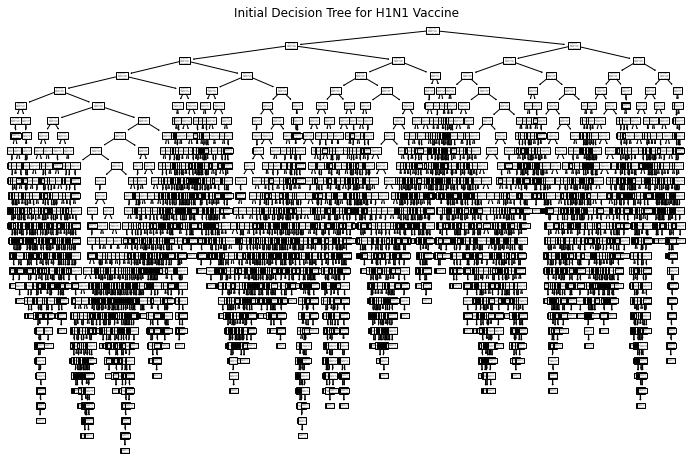

In [51]:
fig, ax = plt.subplots(figsize = (12,8))
plot_tree(clf, ax=ax);
ax.set_title('Initial Decision Tree for H1N1 Vaccine')

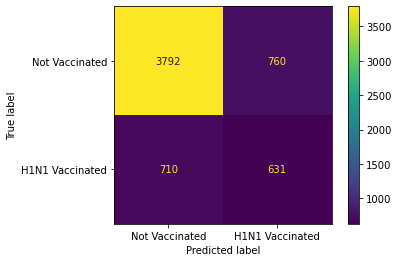

In [52]:
plot_confusion_matrix(clf, X_test, y_test, display_labels = ['Not Vaccinated', 'H1N1 Vaccinated'])

In [53]:
len(X_test)

5893

The true positives as illustrated by the confusion matrix performs well. However the high number of false postive and false negatives remain quite high.

In [54]:
print(f'Test Accuracy Score: {accuracy_score(y_test, tree_predict)}')
print('---------')
print(f'Test Precision Score: {precision_score(y_test, tree_predict)}')
print('---------')
print(f'Test Recall Score: {recall_score(y_test, tree_predict)}')
print('---------')
print(f'Test F1 Score: {f1_score(y_test, tree_predict)}')
print('---------')
print(f'Test ROC AUC Score: {roc_auc_score(y_test, tree_predict)}')


Test Accuracy Score: 0.750551501781775
---------
Test Precision Score: 0.45363048166786485
---------
Test Recall Score: 0.47054436987322895
---------
Test F1 Score: 0.46193265007320644
---------
Test ROC AUC Score: 0.6517923958329237


#### Seasonal Vaccine (Decision Tree)

In [55]:
dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(X_train2, y_train2)

DecisionTreeClassifier(criterion='entropy')

In [56]:
tree_predict2 = clf.predict(X_test2)

print(f'Training Score: {clf.score(X_train2, y_train2)}')
print(f'Test Score: {clf.score(X_test2, y_test2)}')

Training Score: 0.6776492835842607
Test Score: 0.5862888172407942


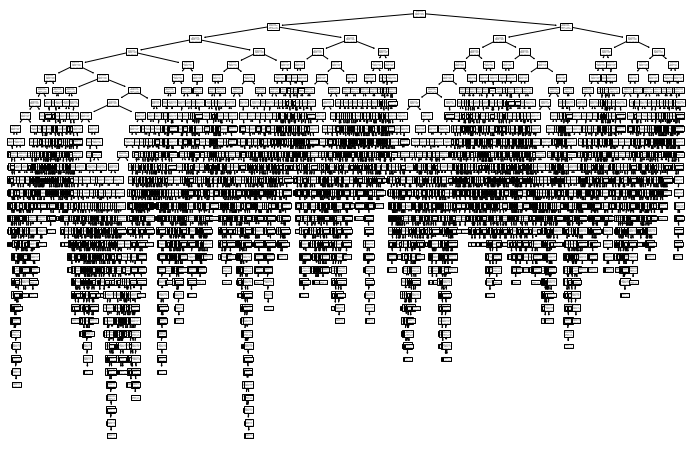

In [57]:
fig, ax = plt.subplots(figsize = (12,8))
plot_tree(dt, ax=ax);

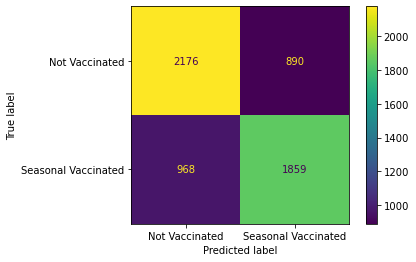

In [58]:
plot_confusion_matrix(dt, X_test2, y_test2, display_labels = ['Not Vaccinated', 'Seasonal Vaccinated'])

The model performs similarly to the H1N1 model. With high false postives and false negatives.

In [59]:
print(f'Test Accuracy Score: {accuracy_score(y_test2, tree_predict2)}')
print('---------')
print(f'Test Precision Score: {precision_score(y_test2, tree_predict2)}')
print('---------')
print(f'Test Recall Score: {recall_score(y_test2, tree_predict2)}')
print('---------')
print(f'Test F1 Score: {f1_score(y_test2, tree_predict2)}')
print('---------')
print(f'Test ROC AUC Score: {roc_auc_score(y_test2, tree_predict2)}')

Test Accuracy Score: 0.5862888172407942
---------
Test Precision Score: 0.6398274622573688
---------
Test Recall Score: 0.314821365405023
---------
Test F1 Score: 0.4220009483167378
---------
Test ROC AUC Score: 0.5757081386712003


In comparison to the H1N1 model, the scores for the seasonal vaccine are lower across the board. It is less efficient in labeling an observation as positive when it is, and of the observations it did predict to be positive, a large portion are actually negative. These models can later be improved by implementing ensemble methods and tuning the parameters.

## K-Nearest Neighbors
the k-nearest neighbors algorithm (k-NN) is a non-parametric classification method. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors.

In [60]:
data_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 52 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   h1n1_vaccine                              19642 non-null  int64  
 1   seasonal_vaccine                          19642 non-null  int64  
 2   h1n1_concern                              19642 non-null  float64
 3   h1n1_knowledge                            19642 non-null  float64
 4   behavioral_antiviral_meds                 19642 non-null  float64
 5   behavioral_avoidance                      19642 non-null  float64
 6   behavioral_face_mask                      19642 non-null  float64
 7   behavioral_wash_hands                     19642 non-null  float64
 8   behavioral_large_gatherings               19642 non-null  float64
 9   behavioral_outside_home                   19642 non-null  float64
 10  behavioral_touch_face             

#### Splitting and Scaling Data

In [61]:
kNN = data_tree.astype('int64')

In [62]:
X = kNN.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis = 1)
y = kNN['h1n1_vaccine']
y2 = kNN['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size = 0.3, random_state = 42)

In [63]:
#Scaling the data so that all features are in the same arbitrary unit. This allows for comparison after modeling
scaler = StandardScaler()

scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)

scaled_train = pd.DataFrame(scaled_train, columns=X.columns)
scaled_train.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0          1.56           -0.52                      -0.23   
1          0.43           -0.52                       4.32   
2         -0.70           -0.52                      -0.23   
3          0.43           -0.52                      -0.23   
4         -0.70           -0.52                      -0.23   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                 -1.70                 -0.27                   0.44   
1                 -1.70                  3.69                   0.44   
2                  0.59                 -0.27                   0.44   
3                  0.59                 -0.27                   0.44   
4                  0.59                 -0.27                   0.44   

   behavioral_large_gatherings  behavioral_outside_home  \
0                        -0.74                    -0.70   
1                         1.35                     1.43   
2                        -0.74                    -0.70   
3                        -0.74                     1.43   
4                        -0.74                     1.43   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                   0.67             -0.54                 -0.70   
1                  -1.48             -0.54                  1.42   
2                   0.67             -0.54                 -0.70   
3                   0.67             -0.54                 -0.70   
4                   0.67              1.84                  1.42   

   chronic_med_condition  child_under_6_months  health_worker  \
0                  -0.63                 -0.30          -0.37   
1                   1.59                 -0.30          -0.37   
2                  -0.63                 -0.30          -0.37   
3                  -0.63                 -0.30          -0.37   
4                   1.59                 -0.30          -0.37   

   opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0                         0.08              -1.06   
1                         0.08              -1.06   
2                         0.08              -0.28   
3                         1.10              -0.28   
4                         1.10              -0.28   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                         1.21                        -0.05   
1                        -0.26                         0.88   
2                        -1.00                         0.88   
3                        -0.26                         0.88   
4                        -1.00                         0.88   

   opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  \
0              -0.55                        -0.84              0.13   
1               0.89                        -0.08              1.47   
2              -0.55                        -0.84              0.13   
3               0.89                        -0.08             -1.21   
4              -0.55                        -0.84             -1.21   

   household_children  age_group_18 - 34 Years  age_group_35 - 44 Years  \
0               -0.59                    -0.50                    -0.42   
1               -0.59                    -0.50                    -0.42   
2                1.55                    -0.50                     2.36   
3               -0.59                     1.98                    -0.42   
4               -0.59                    -0.50                    -0.42   

   age_group_45 - 54 Years  age_group_55 - 64 Years  age_group_65+ Years  \
0                     1.96                    -0.52                -0.54   
1                    -0.51                    -0.52                 1.85   
2                    -0.51                    -0.52                -0.54   
3                    -0.51                    -0.52                -0.54   
4                     1.96                    -0.52                -0.54   

   educat

#### H1N1 Vaccine (k-Nearest Neighbor)

In [64]:
k_near = KNeighborsClassifier(weights = 'distance', algorithm = 'auto')
k_near.fit(scaled_train, y_train)
test_preds = k_near.predict(scaled_test)

In [65]:
#Creating function that prints metrics for the model
def print_metrics(labels, preds):
    """Takes in two parameters and returns the precision, recall, 
        and accuracy scores of given test target and predicted values"""

    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    print("ROC AUC Score: {}".format(roc_auc_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.5789473684210527
Recall Score: 0.3117076808351976
Accuracy Score: 0.791786865772951
F1 Score: 0.40523509452254003
ROC AUC Score: 0.6224619247761226


In [66]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    """Chooses optimal value for value of K by comparing F1 scores for values of K 1 to 25"""
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [67]:
find_best_k(scaled_train, y_train, scaled_test, y_test)

Best Value for k: 3
F1-Score: 0.4117913832199547


Although the ROC AUC score and Accuracy scores don't perform quite as badly as precision, recall and f1 show that the model is not well adept at predicting the test set.

#### Seasonal Vaccine (k-Nearest Neighbor)

In [68]:
k_near2 = KNeighborsClassifier(weights = 'distance', algorithm = 'auto')
k_near2.fit(scaled_train, y_train2)
test_preds2 = k_near.predict(scaled_test)

In [69]:
print_metrics(y_test2, test_preds2)

Precision Score: 0.8005540166204986
Recall Score: 0.20445702157764414
Accuracy Score: 0.5939249957576787
F1 Score: 0.3257255564947873
ROC AUC Score: 0.5787451448397027


In [70]:
find_best_k(scaled_train, y_train2, scaled_test, y_test2)

Best Value for k: 25
F1-Score: 0.7265051395007341


The F1 value for seasonal vaccines is considerably higher. Although the model for H1N1 Vaccination has a lower K (meaning that the model is more prone to be affected by statistical noise), its F1 Score is also lower: F1 Score = 2*(Recall * Precision) / (Recall + Precision). The F1 Score takes weighs the ratio between the number of correctly predicted positive observations to the total predicted positive observations (precision) and the correctly predicted positive observations to the all observations in the actual class (recall). The low F1 score for the H1N1 model tells us that the model is relatively less dependable in predicting values. 

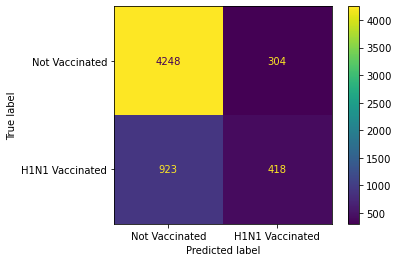

In [71]:
plot_confusion_matrix(k_near, scaled_test, y_test, display_labels = ['Not Vaccinated', 'H1N1 Vaccinated']);

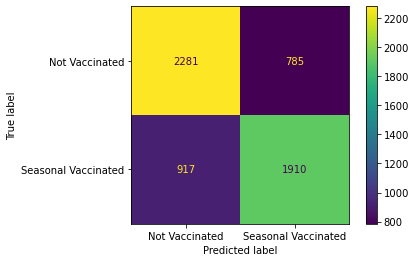

In [72]:
plot_confusion_matrix(k_near2, scaled_test, y_test2, display_labels = ['Not Vaccinated', 'Seasonal Vaccinated'])

## Logistic Regression
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

#### Normalization and Splitting

In [73]:
logReg = data_tree

In [74]:
for column in logReg.columns:
    logReg[column] = (logReg[column] - min(logReg[column])) / (max(logReg[column]) - min(logReg[column]))

In [75]:
logReg

h1n1_vaccine  seasonal_vaccine  h1n1_concern  h1n1_knowledge  \
respondent_id                                                                 
0                      0.00              0.00          0.33            0.00   
1                      0.00              1.00          1.00            1.00   
3                      0.00              1.00          0.33            0.50   
4                      0.00              0.00          0.67            0.50   
5                      0.00              0.00          1.00            0.50   
...                     ...               ...           ...             ...   
26700                  0.00              1.00          1.00            0.50   
26701                  0.00              0.00          0.67            1.00   
26702                  0.00              0.00          0.67            0.00   
26703                  0.00              0.00          0.33            1.00   
26706                  0.00              0.00          0.00            0.00   

               behavioral_antiviral_meds  behavioral_avoidance  \
respondent_id                                                    
0                                   0.00                  0.00   
1                                   0.00                  1.00   
3                                   0.00                  1.00   
4                                   0.00                  1.00   
5                                   0.00                  1.00   
...                                  ...                   ...   
26700                               0.00                  1.00   
26701                               0.00                  0.00   
26702                               0.00                  1.00   
26703                               0.00                  1.00   
26706                               0.00                  1.00   

               behavioral_face_mask  behavioral_wash_hands  \
respondent_id                                                
0                              0.00                   0.00   
1                              0.00                   1.00   
3                              0.00                   1.00   
4                              0.00                   1.00   
5                              0.00                   1.00   
...                             ...                    ...   
26700                          0.00                   1.00   
26701                          0.00                   1.00   
26702                          0.00                   0.00   
26703                          0.00                   1.00   
26706                          0.00                   0.00   

               behavioral_large_gatherings  behavioral_outside_home  \
respondent_id                                                         
0                                     0.00                     1.00   
1                                     0.00                     1.00   
3                                     1.00                     0.00   
4                                     1.00                     0.00   
5                                     0.00                     0.00   
...                                    ...                      ...   
26700                                 0.00                     0.00   
26701                                 0.00                     0.00   
26702                                 0.00                     1.00   
26703                                 0.00                     0.00   
26706                                 0.00                     0.00   

               behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
respondent_id                                                                  
0                               1.00              0.00                  0.00   
1                               1.00              0.00                  0.00   
3                               0.00              0.00                  1.00 

In [76]:
X = logReg.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis = 1)
y = logReg['h1n1_vaccine']
y2 = logReg['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size = 0.3, random_state = 42)

#### Fitting and Predicting (H1N1 Vaccine)

In [77]:
lg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = lg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [78]:
y_hat_test = lg.predict(X_test)
y_hat_train = lg.predict(X_train)

In [79]:
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0.00    11473
1.00     2276
Name: h1n1_vaccine, dtype: int64
0.00   0.83
1.00   0.17
Name: h1n1_vaccine, dtype: float64


In [80]:
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0.00    4871
1.00    1022
Name: h1n1_vaccine, dtype: int64
0.00   0.83
1.00   0.17
Name: h1n1_vaccine, dtype: float64


In [81]:
print(f'Test Accuracy Score: {accuracy_score(y_test, y_hat_test)}')
print('---------')
print(f'Test Precision Score: {precision_score(y_test, y_hat_test)}')
print('---------')
print(f'Test Recall Score: {recall_score(y_test, y_hat_test)}')
print('---------')
print(f'Test F1 Score: {f1_score(y_test, y_hat_test)}')
print('---------')
print(f'Test ROC AUC Score: {roc_auc_score(y_test, y_hat_test)}')

Test Accuracy Score: 0.8265739012387578
---------
Test Precision Score: 0.6802259887005649
---------
Test Recall Score: 0.4489187173750932
---------
Test F1 Score: 0.5408805031446542
---------
Test ROC AUC Score: 0.6933741214291986


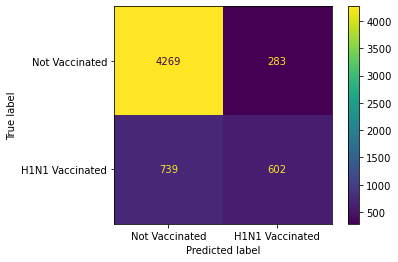

In [82]:
plot_confusion_matrix(lg, X_test, y_test, display_labels = ['Not Vaccinated', 'H1N1 Vaccinated']);

#### Fitting and Predicting (Seasonal Vaccine)

In [83]:
lg2 = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log2 = lg2.fit(X_train2, y_train2)
model_log2

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [84]:
y_hat_test2 = lg2.predict(X_test2)
y_hat_train2 = lg2.predict(X_train2)

In [85]:
residuals2 = np.abs(y_train2 - y_hat_train2)
print(pd.Series(residuals2).value_counts())
print(pd.Series(residuals2).value_counts(normalize=True))

0.00    10756
1.00     2993
Name: seasonal_vaccine, dtype: int64
0.00   0.78
1.00   0.22
Name: seasonal_vaccine, dtype: float64


In [86]:
residuals2 = np.abs(y_test2 - y_hat_test2)
print(pd.Series(residuals2).value_counts())
print(pd.Series(residuals2).value_counts(normalize=True))

0.00    4620
1.00    1273
Name: seasonal_vaccine, dtype: int64
0.00   0.78
1.00   0.22
Name: seasonal_vaccine, dtype: float64


In [87]:
print(f'Test Accuracy Score: {accuracy_score(y_test2, y_hat_test2)}')
print('---------')
print(f'Test Precision Score: {precision_score(y_test2, y_hat_test2)}')
print('---------')
print(f'Test Recall Score: {recall_score(y_test2, y_hat_test2)}')
print('---------')
print(f'Test F1 Score: {f1_score(y_test2, y_hat_test2)}')
print('---------')
print(f'Test ROC AUC Score: {roc_auc_score(y_test2, y_hat_test2)}')

Test Accuracy Score: 0.7839809944001358
---------
Test Precision Score: 0.7839912280701754
---------
Test Recall Score: 0.7587548638132295
---------
Test F1 Score: 0.7711666367068128
---------
Test ROC AUC Score: 0.7829977841571041


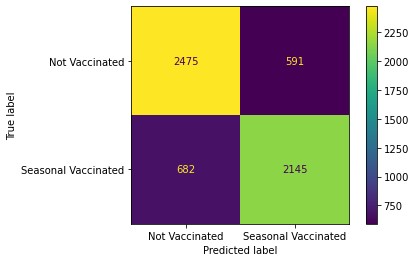

In [88]:
plot_confusion_matrix(lg2, X_test2, y_test2, display_labels = ['Not Vaccinated', 'Seasonal Vaccinated']);

The residuals for training and test sets for both H1N1 and Seasonal Vaccines appear to be quite high (83% and 78% accuracy respectively). However, the identical residuals between training and test sets are a little suspicious. 

### Implementing, Iternating and Tuning Random Forest Model

The analysis deals with dichotomous dependent variables (for both H1N1 and Seasonal Vaccination). The robustness of decision trees make the model an attractive candidate to build an analysis around. However, the long computational time it takes to build and visualize the model along with its susceptability to overfitting and propensity for high variance prove to be cumbersome. On the other hand, k nearest neighbor is often used to identify new observations based on previous observations. Risk averse organizations and endeavors would benefit from implementing the model. The algorithm is more readibly able to extrapolate meaningful monetary analyses. Additionally screening for diseases would benefit from implementing k nearest neighbor. However, the focus of this research is to determine the top 5 most important features driving the sample population to get vaccinated. Logistic regression calculates the likelihood of the outcome (vaccinated vs. not vaccinated) based on the variables inputted in the model. However, because of the high number of features the data set has (also due to one-hot encoding 9 original features) it is susceptable to multicolinearity problems. Due to the main concern of this research, we will shift our focus to decision trees and its derivative, random forest model. By using an ensemble of decision trees, the algorithm will be able to decorrelate features present in the data. Due to one-hot encoding, there are many imbalances in the distribution of 1s in the columns. The random forest model is well adept at handling imbalanced datasets. Lastly, it mitigates the issue of overfitting, as seen earlier with the initial implementation of the decision tree model. 

### Building Initial Random Forest Model

In [89]:
X = data_tree.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis = 1)
y = data_tree['h1n1_vaccine']
y2 = data_tree['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size = 0.3, random_state = 42)

#### H1N1 

In [90]:
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [91]:
rfc_pred_train = rfc.predict(X_train)
rfc_pred_test = rfc.predict(X_test)

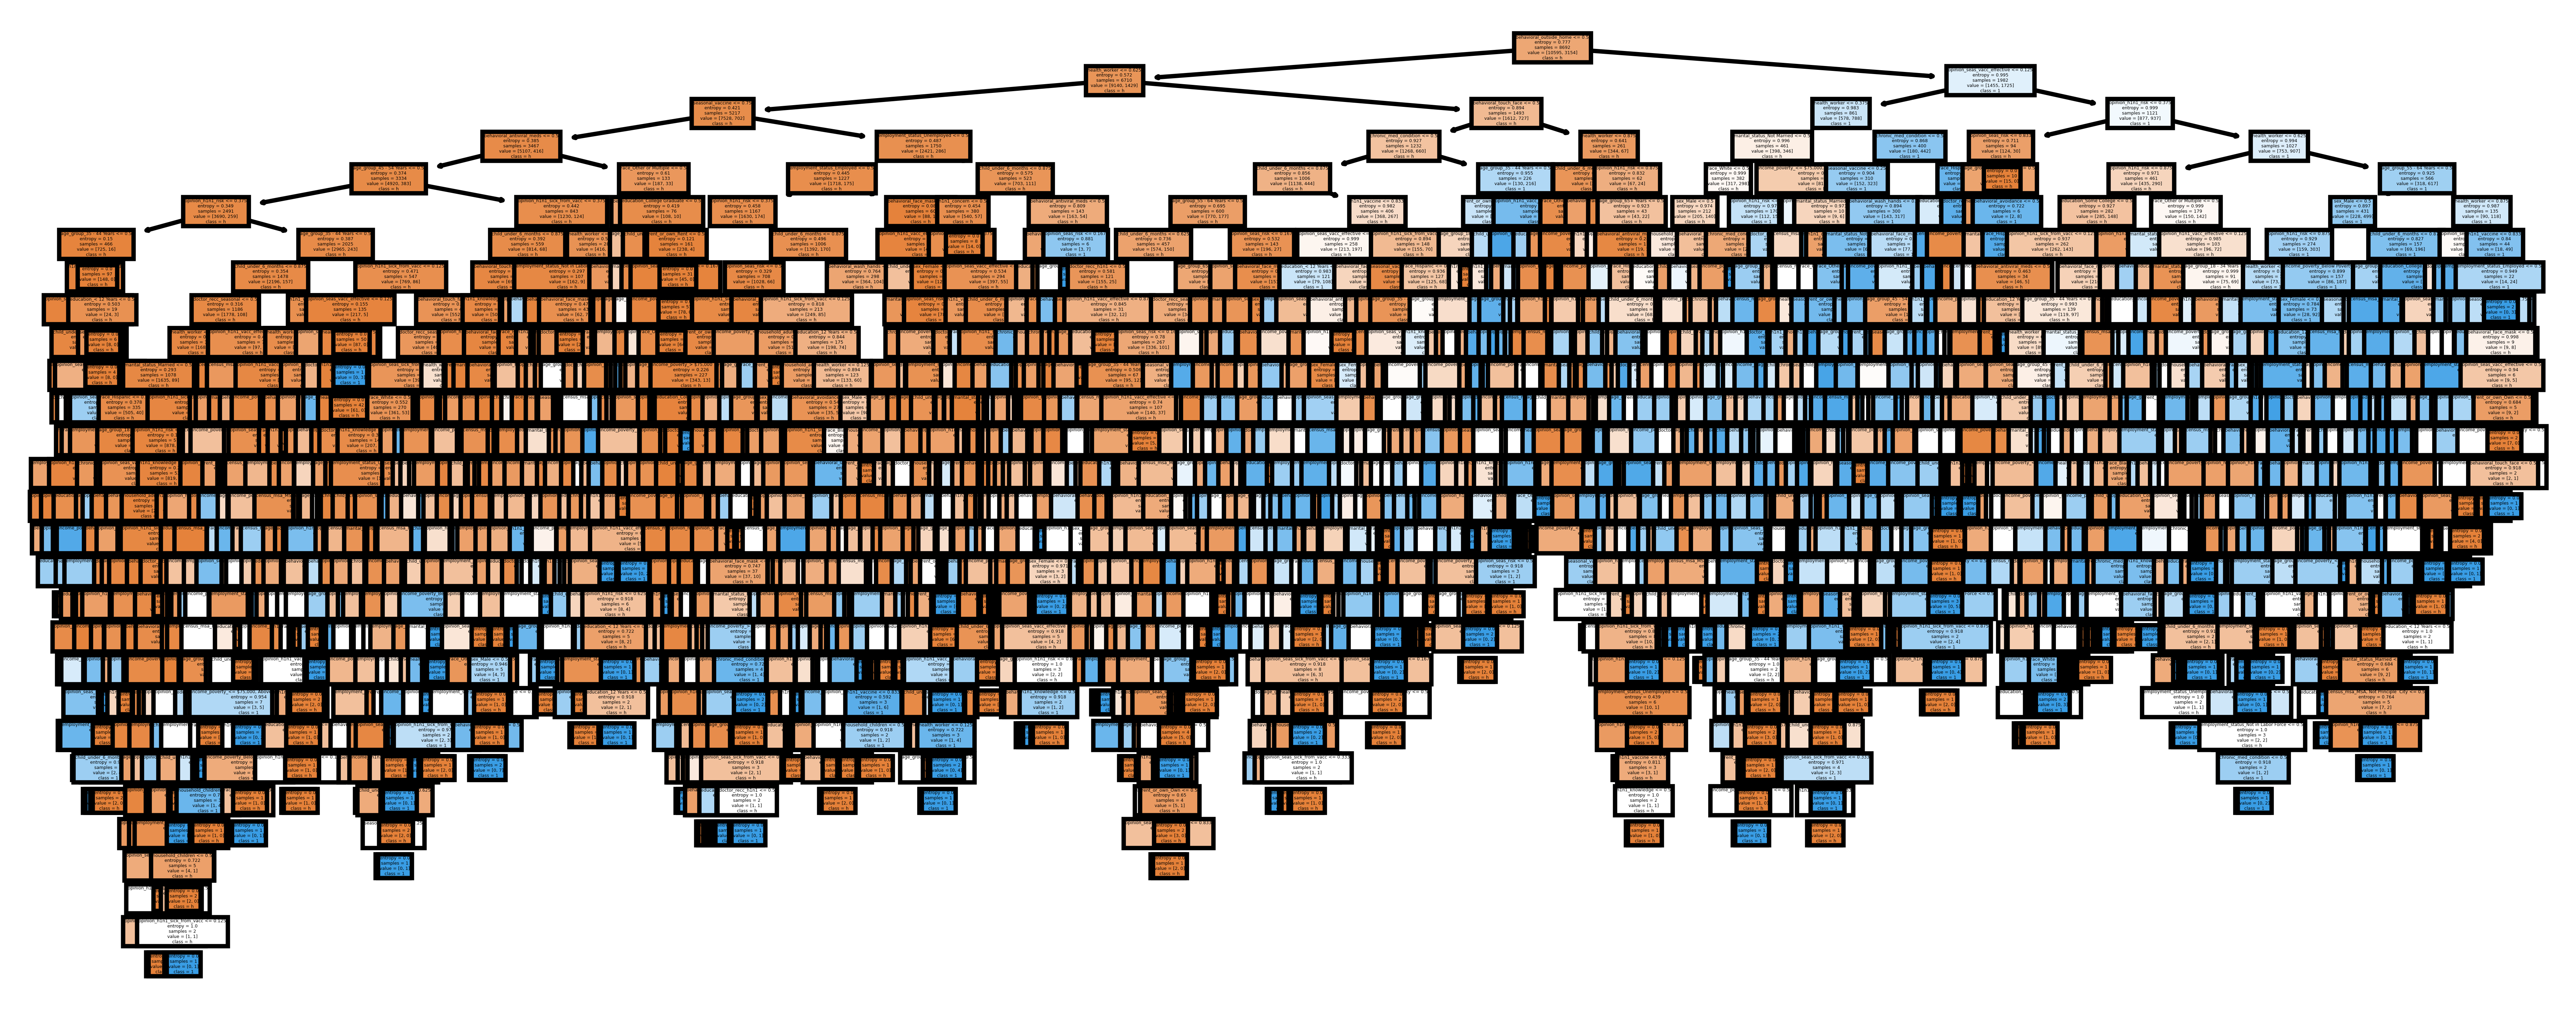

In [92]:
fn= data_tree.columns
cn= 'h1n1_vaccine'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,4), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rfc.estimators_[0],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True);
fig.savefig('rf_5trees.png')

In [93]:
print_metrics(y_train, rfc_pred_train)

Precision Score: 0.9996847414880202
Recall Score: 0.9993696816892531
Accuracy Score: 0.9997818023128955
F1 Score: 0.9995271867612294
ROC AUC Score: 0.9996375639913739


In [94]:
print_metrics(y_test, rfc_pred_test)

Precision Score: 0.6780660377358491
Recall Score: 0.42878448918717377
Accuracy Score: 0.8236891226879348
F1 Score: 0.5253540429419826
ROC AUC Score: 0.6844054256129191


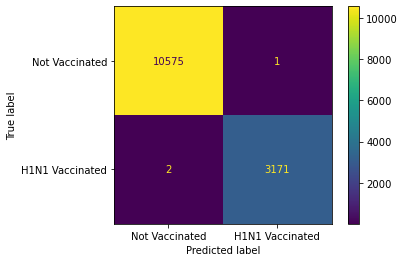

In [95]:
plot_confusion_matrix(rfc, X_train, y_train, display_labels = ['Not Vaccinated', 'H1N1 Vaccinated']);
#The random forest model is quite overfitted to the training data 

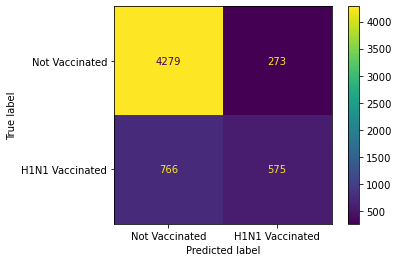

In [96]:
plot_confusion_matrix(rfc, X_test, y_test, display_labels = ['Not Vaccinated', 'H1N1 Vaccinated']);

In [97]:
print(f'Training Score: {rfc.score(X_train, y_train)}')
print(f'Test Score: {rfc.score(X_test, y_test)}')

Training Score: 0.9997818023128955
Test Score: 0.8236891226879348


In [98]:
start_time = time.time()
importances = rfc.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rfc.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.017 seconds


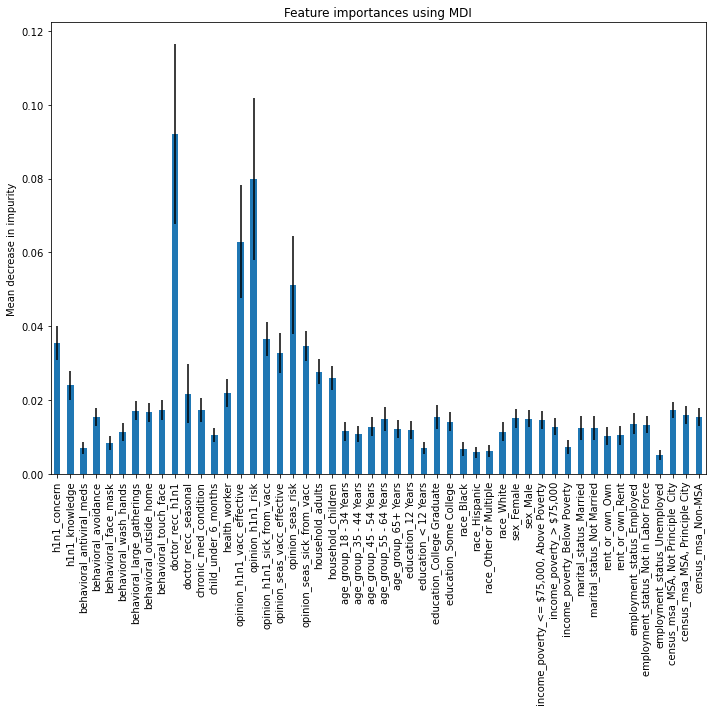

In [99]:
forest_importances = pd.Series(importances, index = X_train.columns)

fig, ax = plt.subplots(figsize = (10,10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [100]:
# Get numerical feature importances
importances = list(rfc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: doctor_recc_h1n1     Importance: 0.09
Variable: opinion_h1n1_risk    Importance: 0.08
Variable: opinion_h1n1_vacc_effective Importance: 0.06
Variable: opinion_seas_risk    Importance: 0.05
Variable: h1n1_concern         Importance: 0.04
Variable: opinion_h1n1_sick_from_vacc Importance: 0.04
Variable: opinion_seas_vacc_effective Importance: 0.03
Variable: opinion_seas_sick_from_vacc Importance: 0.03
Variable: household_adults     Importance: 0.03
Variable: household_children   Importance: 0.03
Variable: h1n1_knowledge       Importance: 0.02
Variable: behavioral_avoidance Importance: 0.02
Variable: behavioral_large_gatherings Importance: 0.02
Variable: behavioral_outside_home Importance: 0.02
Variable: behavioral_touch_face Importance: 0.02
Variable: doctor_recc_seasonal Importance: 0.02
Variable: chronic_med_condition Importance: 0.02
Variable: health_worker        Importance: 0.02
Variable: education_College Graduate Importance: 0.02
Variable: sex_Female           Importance:

#### Seasonal

In [101]:
rfc2 = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc2.fit(X_train2, y_train2)

RandomForestClassifier(criterion='entropy', random_state=42)

In [102]:
rfc_pred_train2 = rfc2.predict(X_train)
rfc_pred_test2 = rfc2.predict(X_test)

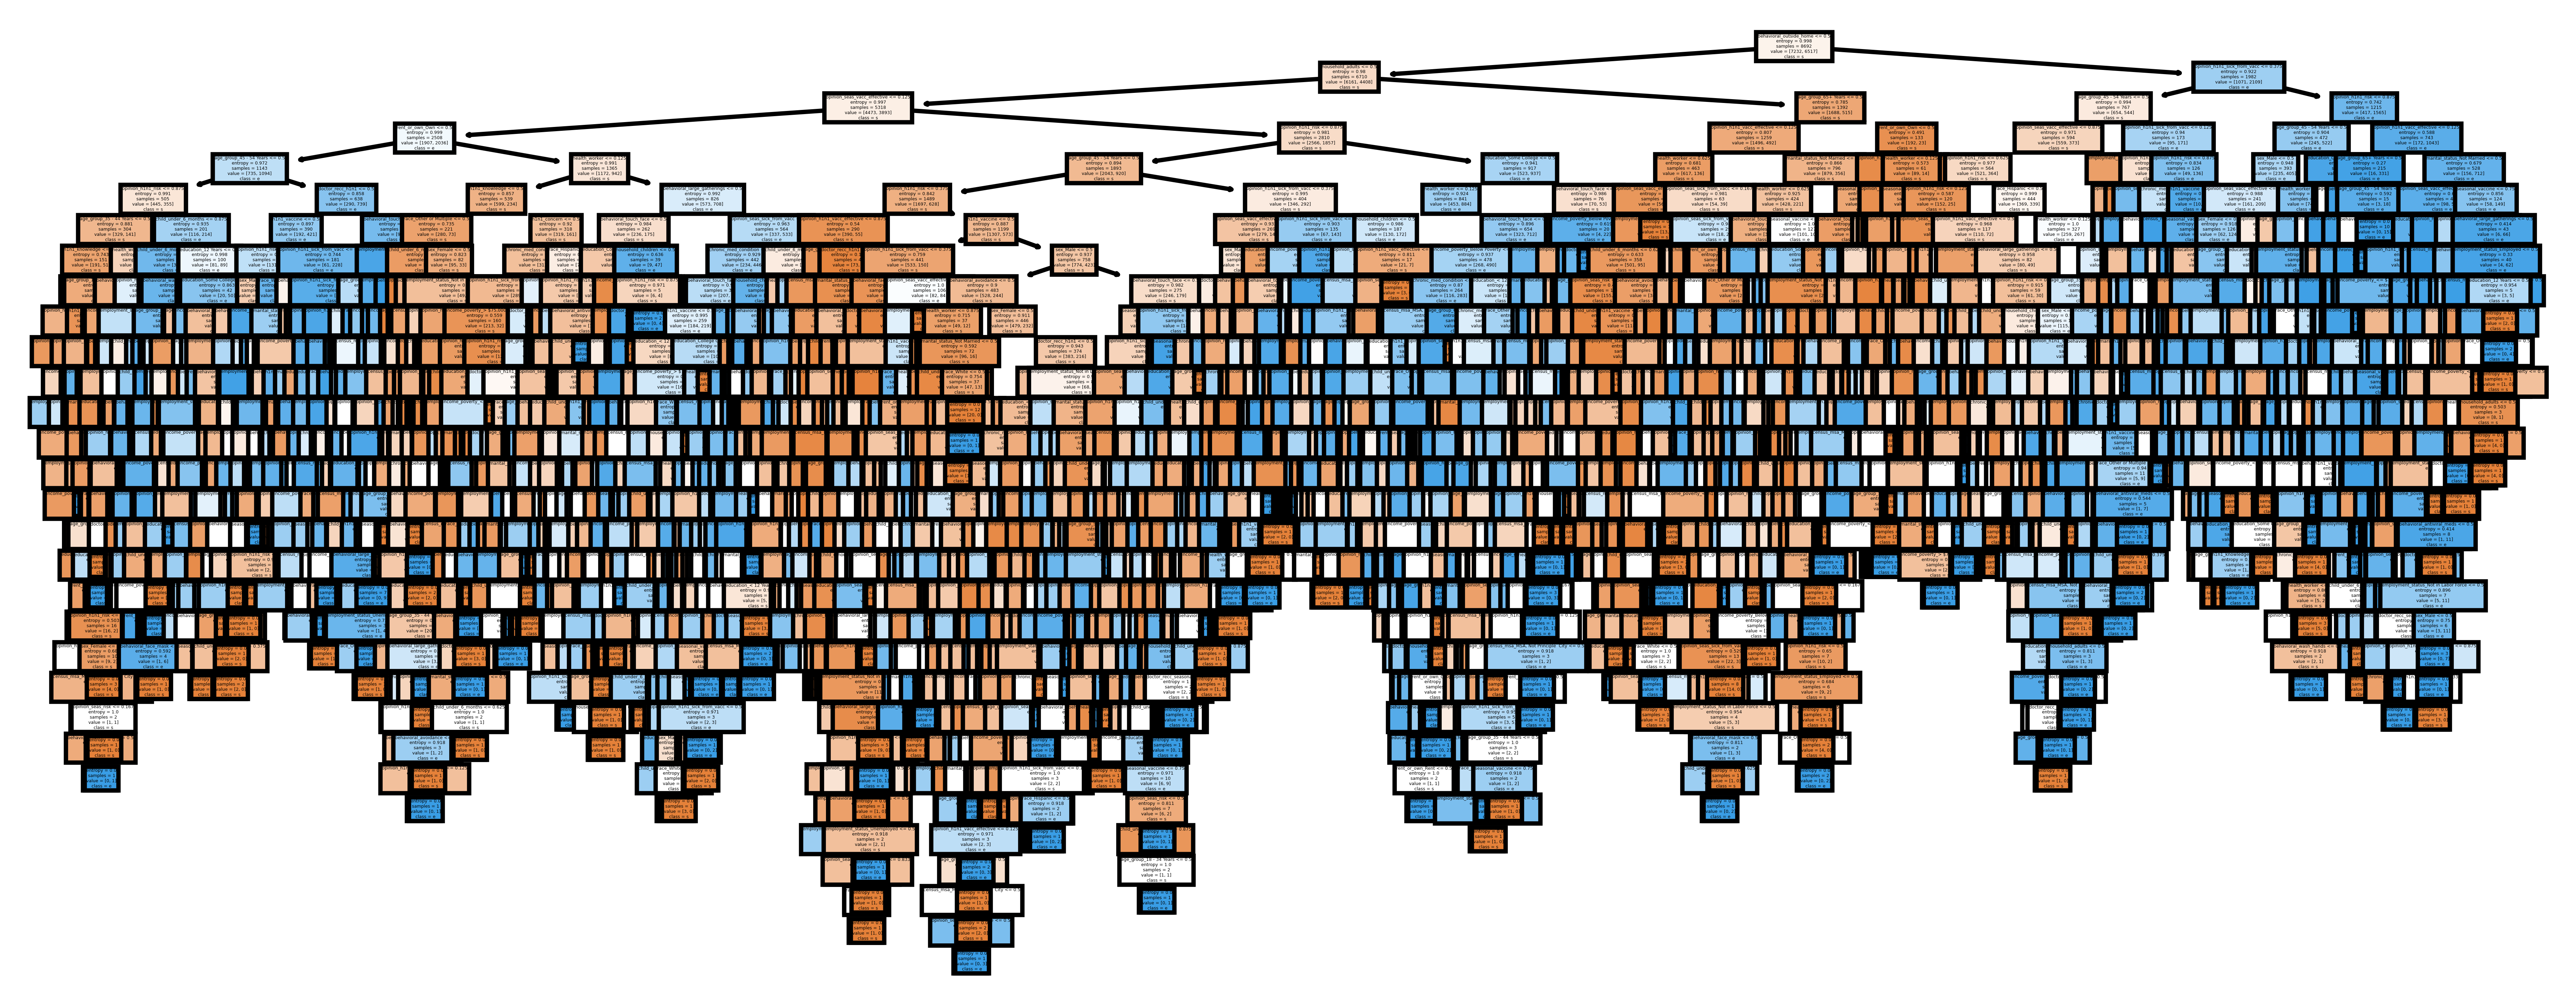

In [103]:
fn= data_tree.columns
cn= 'seasonal_vaccine'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,4), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rfc2.estimators_[0],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True);
fig.savefig('rf_5trees.png')

In [104]:
print_metrics(y_train2, rfc_pred_train2)

Precision Score: 0.9995429616087751
Recall Score: 1.0
Accuracy Score: 0.9997818023128955
F1 Score: 0.9997714285714285
ROC AUC Score: 0.9997913188647747


In [105]:
print_metrics(y_test2, rfc_pred_test2)

Precision Score: 0.7840701497990501
Recall Score: 0.7591085956844712
Accuracy Score: 0.7841506872560665
F1 Score: 0.7713874910136592
ROC AUC Score: 0.7831746500927248


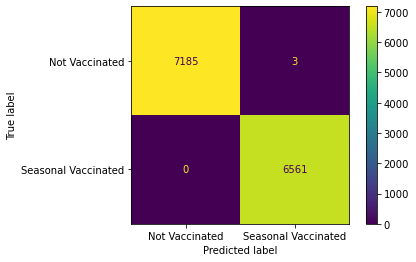

In [106]:
plot_confusion_matrix(rfc2, X_train2, y_train2, display_labels = ['Not Vaccinated', 'Seasonal Vaccinated']);

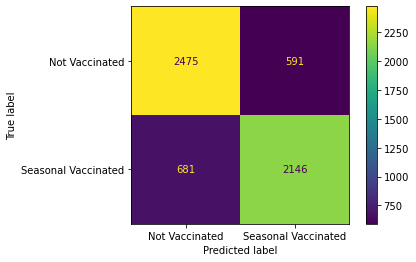

In [107]:
plot_confusion_matrix(rfc2, X_test2, y_test2, display_labels = ['Not Vaccinated', 'Seasonal Vaccinated']);

In [108]:
print(f'Training Score: {rfc2.score(X_train2, y_train2)}')
print(f'Test Score: {rfc2.score(X_test2, y_test2)}')

Training Score: 0.9997818023128955
Test Score: 0.7841506872560665


In [109]:
start_time = time.time()
importances = rfc2.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rfc2.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.020 seconds


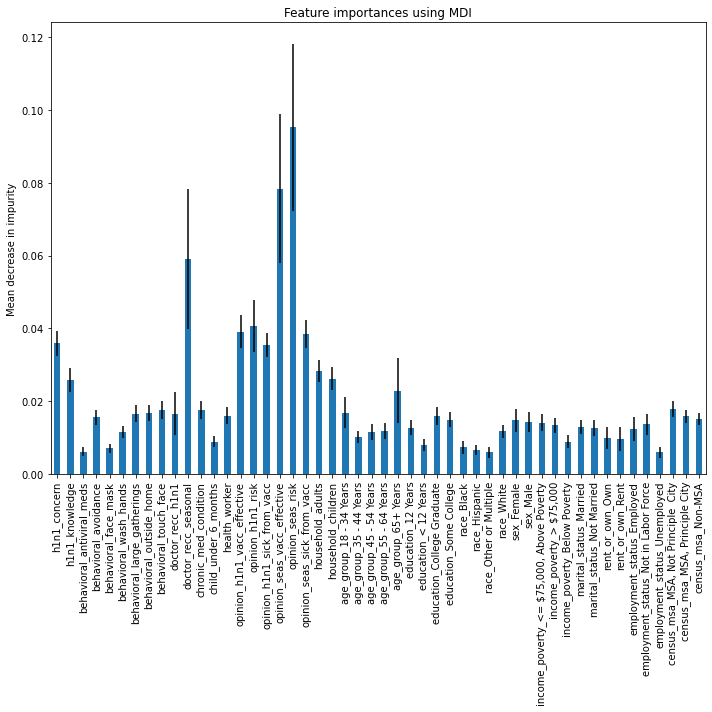

In [110]:
forest_importances = pd.Series(importances, index = X_train.columns)

fig, ax = plt.subplots(figsize = (10,10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [111]:
# Get numerical feature importances
importances = list(rfc2.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: opinion_seas_risk    Importance: 0.1
Variable: opinion_seas_vacc_effective Importance: 0.08
Variable: doctor_recc_seasonal Importance: 0.06
Variable: h1n1_concern         Importance: 0.04
Variable: opinion_h1n1_vacc_effective Importance: 0.04
Variable: opinion_h1n1_risk    Importance: 0.04
Variable: opinion_h1n1_sick_from_vacc Importance: 0.04
Variable: opinion_seas_sick_from_vacc Importance: 0.04
Variable: h1n1_knowledge       Importance: 0.03
Variable: household_adults     Importance: 0.03
Variable: household_children   Importance: 0.03
Variable: behavioral_avoidance Importance: 0.02
Variable: behavioral_large_gatherings Importance: 0.02
Variable: behavioral_outside_home Importance: 0.02
Variable: behavioral_touch_face Importance: 0.02
Variable: doctor_recc_h1n1     Importance: 0.02
Variable: chronic_med_condition Importance: 0.02
Variable: health_worker        Importance: 0.02
Variable: age_group_18 - 34 Years Importance: 0.02
Variable: age_group_65+ Years  Importance: 0.0

The model for both H1N1 Vaccination and Seasonal Vaccination are overfitting the training set. The accuracy, precision, recall, f1, and roc auc scores for both types of vaccines are significantly higher than those of the test sets. Albeit, the 

### Decision Tree / Random Forest Iteration / Bagged Trees

#### Bagged Trees (H1N1)

In [112]:
clf = DecisionTreeClassifier(criterion='gini', max_depth = 5)

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [113]:
clf.feature_importances_

array([0.00294019, 0.00430897, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.52192659,
       0.00682956, 0.        , 0.        , 0.06423235, 0.15339276,
       0.20433117, 0.        , 0.00112278, 0.00714957, 0.        ,
       0.        , 0.00442925, 0.00641317, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00568552, 0.        , 0.        , 0.01393168,
       0.        , 0.        , 0.        , 0.        , 0.00152322,
       0.        , 0.        , 0.        , 0.        , 0.00178323,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [114]:
bagged_tree = BaggingClassifier((clf), n_estimators = 20)

In [115]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [116]:
clf_pred_train = bagged_tree.predict(X_train)
clf_pred_test = bagged_tree.predict(X_test)

In [117]:
bagged_tree.score(X_train, y_train)

0.8322787111789949

In [118]:
bagged_tree.score(X_test, y_test)

0.8214831155608349

In [119]:
print_metrics(y_train, clf_pred_train)

Precision Score: 0.705938242280285
Recall Score: 0.4683265048849669
Accuracy Score: 0.8322787111789949
F1 Score: 0.5630920803334597
ROC AUC Score: 0.7048988802790948


In [120]:
print_metrics(y_test, clf_pred_test)

Precision Score: 0.6690058479532164
Recall Score: 0.42654735272184935
Accuracy Score: 0.8214831155608349
F1 Score: 0.5209471766848817
ROC AUC Score: 0.6821884391025766


The bagged tree model does not improve our recall score significantly, however the precision score has risen. 

#### Bagged Trees (Seasonal)

In [121]:
clf2 = DecisionTreeClassifier(criterion='gini', max_depth = 5)

clf2.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=5)

In [122]:
bagged_tree2 = BaggingClassifier((clf2), n_estimators = 20)

In [123]:
bagged_tree2.fit(X_train2, y_train2)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [124]:
clf_pred_train2 = bagged_tree2.predict(X_train2)
clf_pred_test2 = bagged_tree2.predict(X_test2)

In [125]:
bagged_tree2.score(X_train2, y_train2)

0.7722016146628846

In [126]:
bagged_tree2.score(X_test2, y_test2)

0.7712540302053283

In [127]:
print_metrics(y_train2, clf_pred_train2)

Precision Score: 0.7570079448358566
Recall Score: 0.7696997408931565
Accuracy Score: 0.7722016146628846
F1 Score: 0.7633010882708584
ROC AUC Score: 0.772092497046467


In [128]:
print_metrics(y_test, clf_pred_test2)

Precision Score: 0.3389414651244304
Recall Score: 0.72110365398956
Accuracy Score: 0.6164941455964704
F1 Score: 0.46113495469718646
ROC AUC Score: 0.6533901398243055


### Final Tuning 

#### H1N1 Vaccine

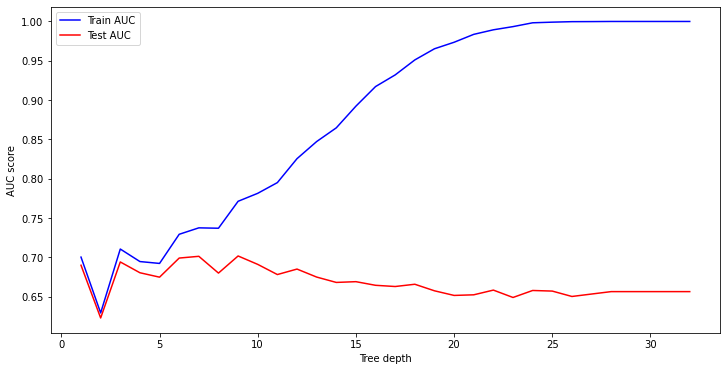

In [129]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

Training error decreases with increasing tree depth. Training and Test errors rise rapidly between 4 and 5

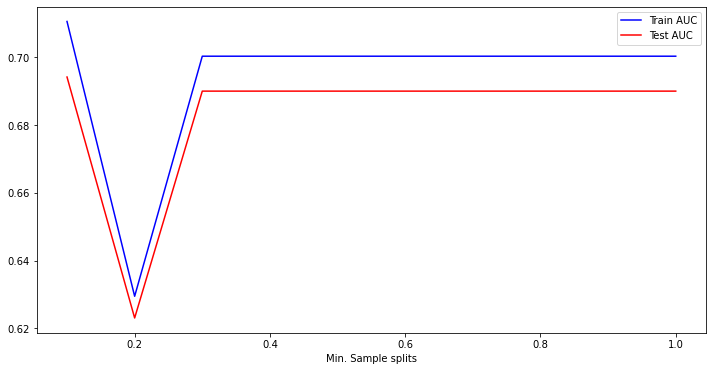

In [130]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=42)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

Around 0.3, the Area Under the Curve both stablize for training and testing sets. Raising the minimum sample split above 0.3 does nothing in improving the model.

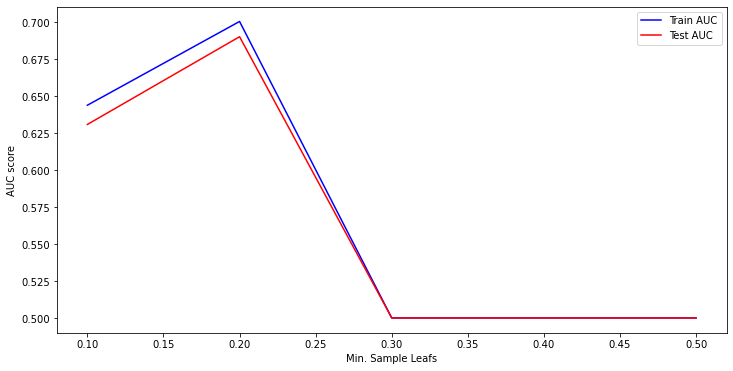

In [131]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=42)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

After 0.2, the accuracy of the model drastically plunges. 

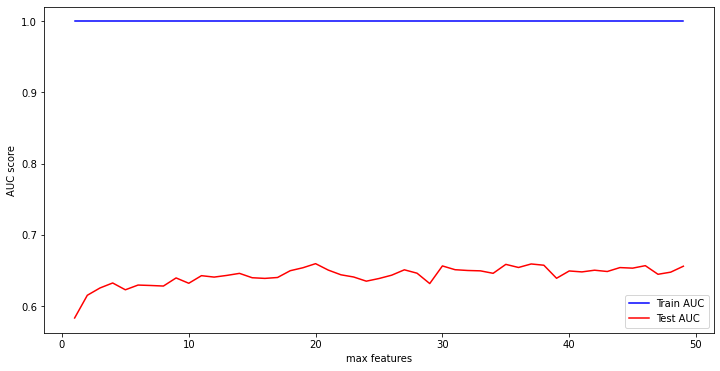

In [132]:
# Find the best value for optimal maximum feature size
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=42)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

The relationship between maximum feature size and AUC cannot be determined. The fluctuation seen with the test set is not present with the training set. 

In [150]:
#Creating decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy',
                           max_features=35,
                           max_depth=3,
                           min_samples_split=0.3,
                           min_samples_leaf=0.2, 
                           random_state=42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=35,
                       min_samples_leaf=0.2, min_samples_split=0.3,
                       random_state=42)

In [151]:
tree_predict = clf.predict(X_test)

print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Test Score: {clf.score(X_test, y_test)}')

Training Score: 0.7886391737580914
Test Score: 0.7856779229594434


#### Seasonal Vaccine

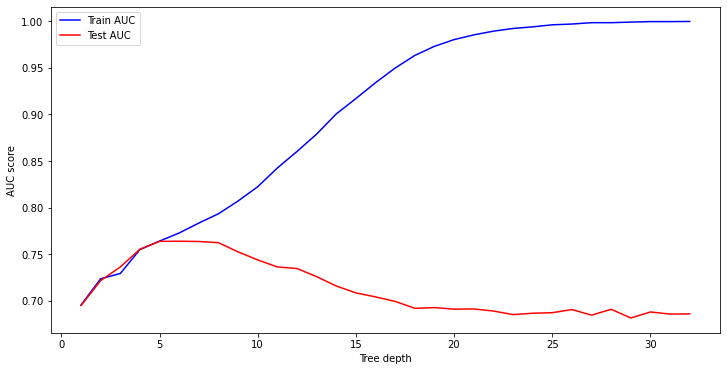

In [145]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
   dt2.fit(X_train2, y_train2)
   train_pred2 = dt2.predict(X_train2)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train2, train_pred2)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred2 = dt2.predict(X_test2)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test2, y_pred2)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

Training error decreases with increasing tree depth. Training and Test errors rise rapidly after 5.

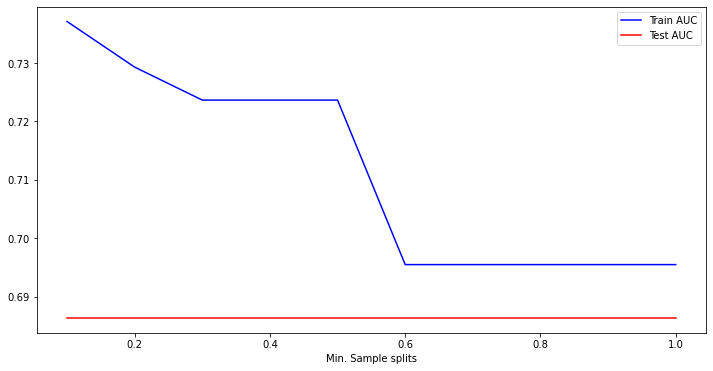

In [146]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt2 = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=42)
   dt2.fit(X_train2, y_train2)
   train_pred2 = dt2.predict(X_train2)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train2, train_pred2)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred2 = dt.predict(X_test2)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test2, y_pred2)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

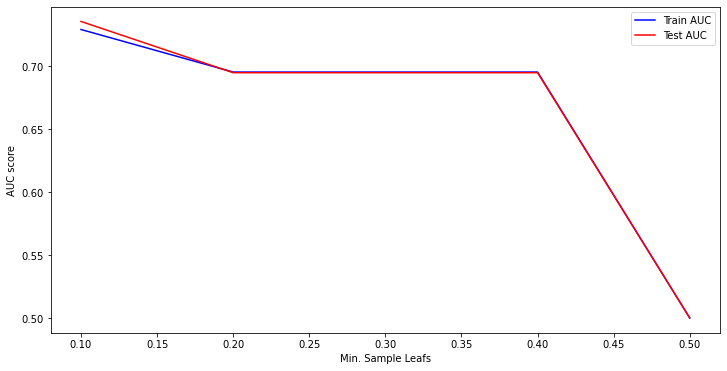

In [147]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt2 = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=42)
   dt2.fit(X_train2, y_train2)
   train_pred2 = dt2.predict(X_train2)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train2, train_pred2)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred2 = dt2.predict(X_test2)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test2, y_pred2)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

In [ ]:
After 0.2, the accuracy of the model drastically plunges. 

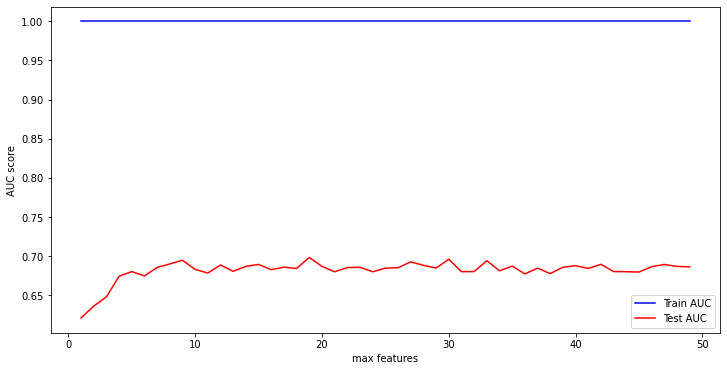

In [148]:
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt2 = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=42)
   dt2.fit(X_train2, y_train2)
   train_pred2 = dt.predict(X_train2)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train2, train_pred2)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred2 = dt2.predict(X_test2)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test2, y_pred2)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

The relationship between maximum feature size and AUC cannot be determined. The fluctuation seen with the test set is not present with the training set.

In [161]:
clf2 = DecisionTreeClassifier(criterion='entropy',
                           max_features=18,
                           max_depth=5,
                           min_samples_split=0.3,
                           min_samples_leaf=0.2, 
                           random_state=42)

clf2.fit(X_train2, y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=18,
                       min_samples_leaf=0.2, min_samples_split=0.3,
                       random_state=42)

### Final Analysis and Reccomendations

In [173]:
start_time = time.time()
importances = rfc.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rfc.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.023 seconds


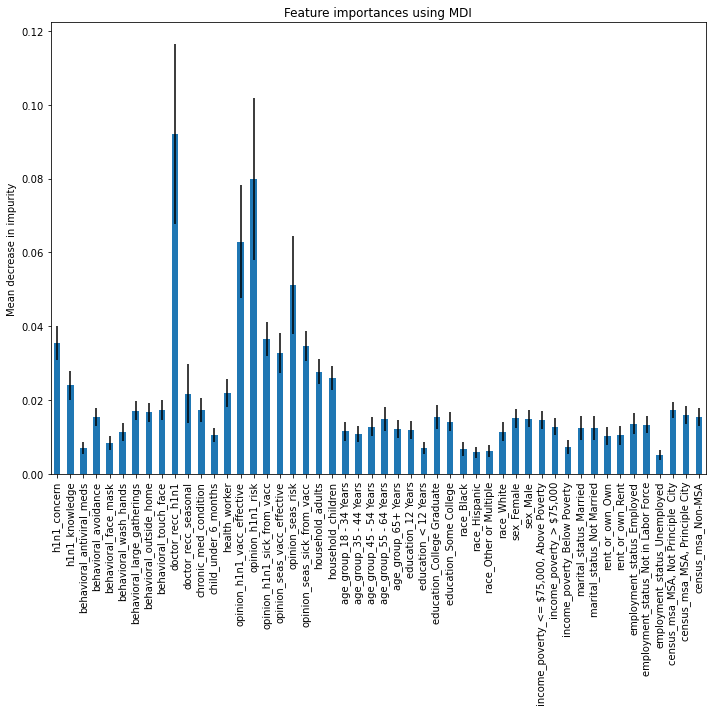

In [174]:
forest_importances = pd.Series(importances, index = X_train.columns)

fig, ax = plt.subplots(figsize = (10,10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Features 'doctor_recc_h1n1', 'opinion_h1n1_risk', 'opinion_h1n1_vacc_effective' appear to be the most important in determining who will get H1N1 vaccines.

In [176]:
H1N1 = {'doctor_recc_h1n1': .09, 'opinion_h1n1_risk': .08, 'opinion_h1n1_vacc_effective': .06}

In [170]:
start_time = time.time()
importances = rfc2.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rfc2.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.024 seconds


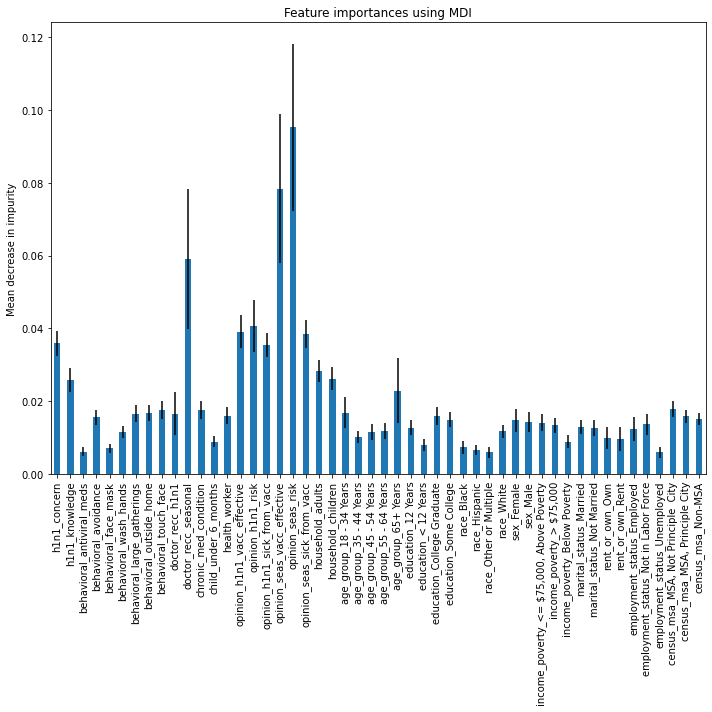

In [171]:
tree_importances = pd.Series(importances, index = X_train2.columns)

fig, ax = plt.subplots(figsize = (10,10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

The features 'opinion_seas_risk', 'opinion_seas_vacc_effective', 'doctor_recc_seasonal' are the top three determining factors on wether or not an indvidual will get vaccinated for the seasonal flu. 

In [177]:
Seasonal = {'opinion_seas_risk': .095, 'opinion_seas_vacc_effective': .08, 'doctor_recc_seasonal': .06}

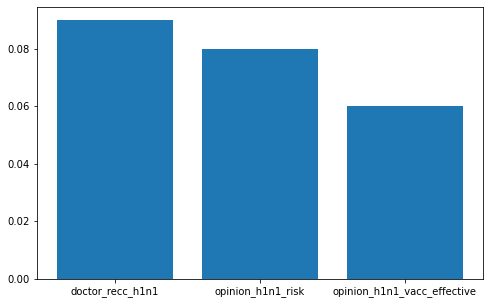

In [184]:
names = list(H1N1.keys())
values = list(H1N1.values())

fig, ax = plt.subplots(figsize = (8,5))
plt.bar(range(len(H1N1)), values, tick_label=names)
plt.show()


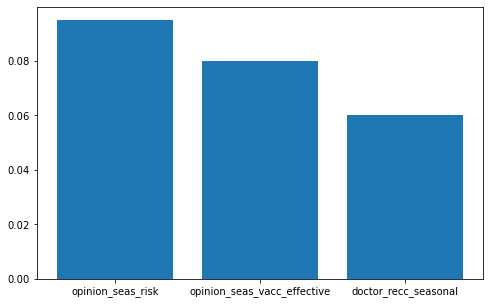

In [189]:
names = list(Seasonal.keys())
values = list(Seasonal.values())

fig, ax = plt.subplots(figsize = (8,5))
plt.bar(range(len(Seasonal)), values, tick_label=names)
plt.show()

The top three features determining the probability of an individual getting vaccinated for both viruses are based on opinion. For the H1N1 vaccine doctor reccomendation, the individual's opinion on whether they at risk of contracting the virus, and their opinion on the efficacy of the vaccine are the top three predictors. Similarly, seasonal flu vaccination rates are driven by the same features. 

People's opinions often dictate their behavior as illustrated by this analysis. Although the distribution of each vaccine differed, the top three important features remained relatively the same (opion based columns regarding the H1N1 vaccine and opinion based columns regarding the seasonal vaccine respectively). 

### Reccomendations for the CDC

In order to raise the rate of vaccination against Covid-19, the CDC should consolidate their efforts in educating the population. As displayed with this research, individuals are highly moved to act based on opinions. The CDC in tandem with the Federal Government should shift their focus towards starting a nationwide campaign to educate communities of the risks of contracting the virus and bolstering the population's opinion of vaccine efficacy. Additionally, it would be prudent to incentivize doctors to reccomend their patients to getting the vaccine. Although these efforts are already being undertaken by the CDC and the Federal Government, it is crucial to provide more attention towards these predictors.